In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def frequentist_mean_ci(data, confidence=0.95):
    """
    Calculate mean and confidence interval using the frequentist approach.
    """
    mean = np.mean(data)
    ci = stats.norm.interval(confidence, loc=mean, scale=stats.sem(data))
    return mean, ci

In [3]:
def bayesian_mean_ci(data, prior_mean, prior_var, likelihood_var, confidence=0.95):
    """
    Calculate mean and credible interval using the Bayesian approach.
    """
    n = len(data)
    sample_mean = np.mean(data)
    posterior_var = 1 / (1/prior_var + n/likelihood_var)
    posterior_mean = (prior_mean/prior_var + n*sample_mean/likelihood_var) * posterior_var
    ci = stats.norm.interval(confidence, loc=posterior_mean, scale=np.sqrt(posterior_var))
    return posterior_mean, ci

## Generating synthetic data

In [4]:
# Generating synthetic data
np.random.seed(42)
data = np.random.normal(5, 2, 100)

## Frequentist Analysis

In [5]:
freq_mean, freq_ci = frequentist_mean_ci(data)

## Bayesian Analysis

In [6]:
bayes_mean, bayes_ci = bayesian_mean_ci(data, prior_mean=5, prior_var=1, likelihood_var=4)

## Visualization

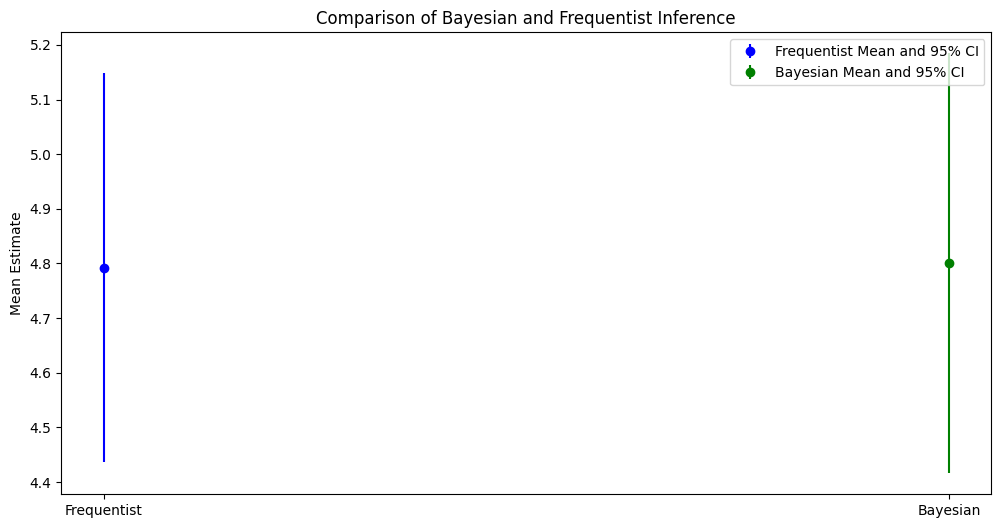

In [7]:
# Visualization
plt.figure(figsize=(12, 6))

# Formatting the yerr for Frequentist results
freq_yerr = np.array([[freq_mean - freq_ci[0]], [freq_ci[1] - freq_mean]])

# Plotting Frequentist Results
plt.errorbar(1, freq_mean, yerr=freq_yerr, fmt='o', color='blue', label='Frequentist Mean and 95% CI')

# Formatting the yerr for Bayesian results
bayes_yerr = np.array([[bayes_mean - bayes_ci[0]], [bayes_ci[1] - bayes_mean]])

# Plotting Bayesian Results
plt.errorbar(2, bayes_mean, yerr=bayes_yerr, fmt='o', color='green', label='Bayesian Mean and 95% CI')

plt.xticks([1, 2], ['Frequentist', 'Bayesian'])
plt.ylabel('Mean Estimate')
plt.title('Comparison of Bayesian and Frequentist Inference')
plt.legend()
plt.show()

## Comparison

In [8]:
## Analysis
print(f"Frequentist mean: {freq_mean}, 95% CI: {freq_ci}")
print(f"Bayesian mean (with informative prior): {bayes_mean}, 95% CI: {bayes_ci}")

Frequentist mean: 4.792306965211812, 95% CI: (4.436311483053482, 5.148302447370141)
Bayesian mean (with informative prior): 4.800295158857511, 95% CI: (4.41591459719948, 5.184675720515543)
